Travail réalisé par :
                GHAMRACI RAHIL G1 202031025179 et
                BENZEMRANE LYDIA G1 202031084177

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
import nltk

C:\Users\HP\AppData\Local\Temp\ipykernel_6904\1402726705.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Lecture des données extraites des deux parties

import dask.dataframe as dd
import pandas as pd

df1 = pd.read_csv(r'C:\Users\HP\Desktop\data1.csv', nrows=10000) # lire data1.csv
X1 = df1.iloc[:, :]
print(X1.shape)

df2 = pd.read_csv(r'C:\Users\HP\Desktop\data2.csv', nrows=10000) # lire data2.csv
X2 = df2.iloc[:, :]
print(X2.shape)

X = np.concatenate((X1, X2), axis=0)


# Afficher la forme et le type du tableau concaténé
print("Forme du tableau concaténé:", X.shape)
print("Type du tableau concaténé:", type(X))

# Lecture des données pour extraire y à nouveau
df = pd.read_csv(r'C:\Users\HP\Desktop\Project AARN\Projet TP AARN\training.1600000.processed.noemoticon.csv', header=None, encoding='latin-1')
y = df.iloc[:, 0]

#prendre les meme instance prises dans x1 et x2
half_index = len(y) // 2
y_first_half = y[0:0+10000]
y_second_half = y[half_index:half_index+10000]

y= np.concatenate((y_first_half, y_second_half), axis=0)

y = np.where(y == 4, 1, 0)

print(y.shape)

Xt, Xtt, Yt, Ytt = train_test_split(X, y, test_size = 0.30)

#liberer de l'espace
del y_first_half
del y_second_half
del df
del X1
del X2
del X
del y

c:\Python311\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


(10000, 1429)
(10000, 1429)
Forme du tableau concaténé: (20000, 1429)
Type du tableau concaténé: <class 'numpy.ndarray'>
(20000,)


**Classification**

**KNN**

In [ ]:
def calcul_dis(data,instance):
  distances = np.empty((0 ,2))
  #calculer les distances
  for i in range(data.shape[0]):
    dist = np.linalg.norm(data[i,:] - instance)
    distances = np.append(distances, [[dist, i]], axis=0)  #distance dans indice 0 et l'indice de l'instance ( dans le data set) que nous avons calculé sa distance par rapport à la nouvelle instance est dans 1
  #trier le tableau multidimensionnel
  distances = np.array(distances)
  distances_triees = distances[distances[:, 0].argsort()]
  return distances_triees

In [ ]:
def knn(X,Y,instance,k):
  #calculer les distances
  distances = calcul_dis(X,instance)
  # Prendre les 'k' premiers éléments de la liste distances revient à prendre les k plus proches voisins car la liste est triée selon un ordre croissant des distances
  k_premiers_voisins = distances[:k]
  # calculer le nombre d'instance pour chaque classe
  tableau = np.zeros(2, dtype=np.int64)
  for i in range(len(k_premiers_voisins)):
    indice_instance=int(k_premiers_voisins[i, 1])
    #print(indice_instance)
    tableau[Y[indice_instance] ] +=1 # le nombre d'instance de la classe 0 est stocké dans l'indce 0 du tableau , de meme nombre d'instance de la classe 1 est stocké dans l'indce 1 du tableau

  #preandre la classe avec le plus d'instances et l'attribuer à notre nouvelle instance
  indice_max = np.argmax(tableau)
  return indice_max

In [ ]:
c=0
y_pred=knn(Xt,Yt,Xtt[c],6)
print('valeur de y true '+str(Ytt[c]))
print ('valeur de y pédit '+str(y_pred))

valeur de y true 1
valeur de y pédit 1


In [ ]:
# construire le y_pred avec  knn implementé
y_pred_knn = np.zeros(len(Xtt), dtype=np.int64)
for i in range(len(Xtt)):
  y_pred_knn[i]=knn(Xt,Yt,Xtt[i],6)

precision = np.mean(Ytt == y_pred_knn)*100
precision

64.75

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_knn)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_knn)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_knn)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_knn)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.6253333333333333
Recall: 0.5202003338898163
Precision: 0.65766146053187
False Positive Rate: 0.26988352745424293
True Negative Rate: 0.7301164725457571


In [ ]:
def calcul_probs(X, y):
    probs_pos = np.zeros(X.shape[1]) # Stocker les probabilités de chaque mot sachant qu'il apparaît dans un tweet positif
    probs_neg = np.zeros(X.shape[1]) # Stocker les probabilités de chaque mot sachant qu'il apparaît dans un tweet négatif

    nb_tweet_pos = sum(1 for i in y if i == 1)
    nb_tweet_neg = sum(1 for i in y if i == 0)

    for i in range(X.shape[1]):
        # Calcul des probabilités sachant que le mot apparaît dans un tweet positif
        probs_pos[i] = (1 + sum(1 for j in range(X.shape[0]) if X[j, i] == 1 and y[j] == 1) )/ nb_tweet_pos # le 1 c pour le lissage

        # Calcul des probabilités sachant que le mot apparaît dans un tweet négatif
        probs_neg[i] = (1 + sum(1 for j in range(X.shape[0]) if X[j, i] == 1 and y[j] == 0) )/ nb_tweet_neg  # le 1 c pour le lissage

    return probs_pos, probs_neg

In [ ]:
def naif_bayes(probs_pos, probs_neg, p_pos_init, p_neg_init, X):
    p_pos = p_pos_init
    p_neg = p_neg_init

    for i in range(X.shape[0]): # Parcourir la liste des mots dans le tweet
        # Si le mot est présent dans le tweet
        if X[i] == 1:
            p_pos *= probs_pos[i]
            p_neg *= probs_neg[i]

    if p_pos > p_neg:
        return 1
    else:
        return 0


In [ ]:
import random
#calculating initial guess
p_pos_init= sum(1 for i in Yt if i == 1) / Xt.shape[0]
p_neg_init= sum(1 for i in Yt if i == 0) / Xt.shape[0]
probs_pos, probs_neg = calcul_probs(Xt,Yt)
print(probs_pos)
print(probs_neg)
print(Xtt[0].shape[0])
c = random.randint(0, Xtt.shape[0])
y_pred=naif_bayes(probs_pos, probs_neg, p_pos_init, p_neg_init,Xtt[0])
print('valeur de y true '+str(Ytt[0]))
print ('valeur de y pédit '+str(y_pred))



[0.00243483 0.00014323 0.03766829 ... 0.00014323 0.00014323 0.00014323]
[0.00370476 0.00185238 0.04474209 ... 0.00014249 0.00014249 0.00014249]
2328
valeur de y true 1
valeur de y pédit 0


In [ ]:
y_pred_naif_bayes = np.zeros(len(Xtt), dtype=np.int64)
for i in range(len(Xtt)):
  y_pred_naif_bayes[i]=naif_bayes(probs_pos, probs_neg, p_pos_init, p_neg_init,Xtt[i])

precision = np.mean(Ytt == y_pred_naif_bayes)*100
precision

71.76666666666667

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_naif_bayes)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_naif_bayes)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_naif_bayes)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_naif_bayes)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.7176666666666667
Recall: 0.6474486414844268
Precision: 0.7561919504643962
False Positive Rate: 0.2112676056338028
True Negative Rate: 0.7887323943661971


**SVM**

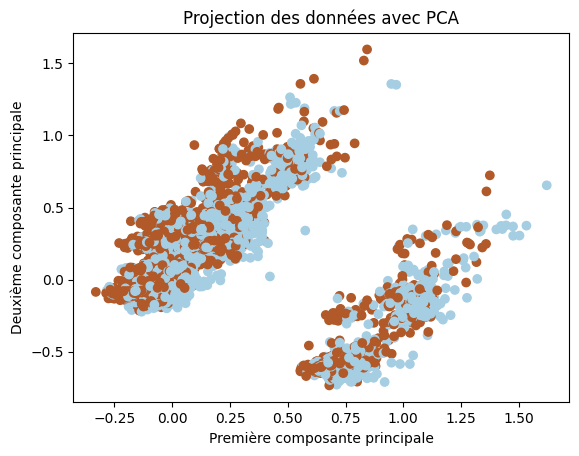

In [ ]:
from sklearn.decomposition import PCA

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xt)

# Tracer les points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Yt, cmap=plt.cm.Paired)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données avec PCA')
plt.show()


In [ ]:
# ajouter plus  de paramètres
from sklearn import svm
#Créer le modèle
model= svm.SVC(kernel='rbf') # car les données ne sont pas linéairement séparables
# entrainement
model.fit(Xt, Yt)
# Prediction
y_pred_mvs = model.predict(Xtt)

precision = np.mean(Ytt == y_pred_mvs)*100
precision

72.91666666666666

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_mvs)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_mvs)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_mvs)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_mvs)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.7291666666666666
Recall: 0.7664015904572564
Precision: 0.7154345808846273
False Positive Rate: 0.3085177733065057
True Negative Rate: 0.6914822266934944


**Decision** **Tree**

In [ ]:
# ajouter plus  de paramètres
from sklearn.tree import DecisionTreeClassifier
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred_dtree = model.predict(Xtt)

precision = np.mean(Ytt == y_pred_dtree)*100
precision

66.58333333333334

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_dtree)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_dtree)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_dtree)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_dtree)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.6658333333333334
Recall: 0.6328694499668654
Precision: 0.6804417527609548
False Positive Rate: 0.3008048289738431
True Negative Rate: 0.6991951710261569


In [ ]:
import xgboost as xgb

# Définition du modèle
model = xgb.XGBClassifier()

# Entraînement du modèle
model.fit(Xt, Yt)

# Prédiction sur l'ensemble de test
y_pred_xgb = model.predict(Xtt)

precision = np.mean(Ytt == y_pred_xgb)*100
precision

71.65

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_xgb)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_xgb)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_xgb)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_xgb)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.7165
Recall: 0.792909211398277
Precision: 0.6898241568175266
False Positive Rate: 0.3608316566063045
True Negative Rate: 0.6391683433936955


In [ ]:
import lightgbm as lgb

# Définition du modèle
model = lgb.LGBMClassifier()

# Entraînement du modèle
model.fit(Xt,Yt)

# Prédiction sur l'ensemble de test
y_pred_lgb = model.predict(Xtt)

precision = np.mean(Ytt == y_pred_lgb)*100
precision

[LightGBM] [Info] Number of positive: 6982, number of negative: 7018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 747
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498714 -> initscore=-0.005143
[LightGBM] [Info] Start training from score -0.005143


71.65

In [ ]:
conf_matrix = confusion_matrix(Ytt, y_pred_lgb)

# Calcul de l'accuracy (taux de classification correcte)
accuracy = accuracy_score(Ytt, y_pred_lgb)

# Calcul du rappel (taux de vrais positifs)
recall = recall_score(Ytt, y_pred_lgb)

# Calcul de la précision (proportion de vrais positifs parmi les prédictions positives)
precision = precision_score(Ytt, y_pred_lgb)

# Calcul du taux de faux positifs (taux d'échantillons réels négatifs incorrectement classés comme positifs)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calcul du taux de vrais négatifs (taux d'échantillons réels négatifs correctement classés)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("False Positive Rate:", false_positive_rate)
print("True Negative Rate:", true_negative_rate)

Accuracy: 0.7165
Recall: 0.7823061630218688
Precision: 0.6933920704845815
False Positive Rate: 0.3501006036217304
True Negative Rate: 0.6498993963782697


Partie Deep learning

Long Short-Term Memory (LSTM) for sentiment analysis

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Charger un sous-ensemble des données prétraitées
nrows = 10000  # Limiter le nombre de lignes à charger

df1 = pd.read_csv(r'C:\Users\HP\Desktop\data1.csv', nrows=nrows)
df2 = pd.read_csv(r'C:\Users\HP\Desktop\data2.csv', nrows=nrows)

# Combiner les datasets
X = np.concatenate((df1.values, df2.values), axis=0)

# Charger un sous-ensemble des étiquettes
df = pd.read_csv(r'C:\Users\HP\Desktop\Project AARN\Projet TP AARN\training.1600000.processed.noemoticon.csv', header=None, encoding='latin-1', nrows=nrows*2)
y = df.iloc[:, 0].values

# Sélectionner le même sous-ensemble d'étiquettes que dans les données prétraitées
half_index = len(y) // 2
y_first_half = y[:df1.shape[0]]
y_second_half = y[half_index:half_index + df2.shape[0]]
y = np.concatenate((y_first_half, y_second_half), axis=0)
y = np.where(y == 4, 1, 0)  # Convertir les étiquettes en binaire

# Vérifier que les données ont la bonne forme
assert X.shape[0] == y.shape[0], "Nombre d'échantillons incohérent entre les caractéristiques et les étiquettes"


In [ ]:
# Déterminer la longueur maximale des séquences dans le dataset
max_sequence_length = X.shape[1]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Define the model
embedding_dim = 128
model = Sequential()
model.add(Embedding(input_dim=X.shape[1] + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
# Train the model
batch_size = 64
epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=2)


Epoch 1/5


197/197 - 2013s - loss: 0.0239 - accuracy: 0.9975 - val_loss: 4.4952e-05 - val_accuracy: 1.0000 - 2013s/epoch - 10s/step
Epoch 2/5
197/197 - 2169s - loss: 3.3949e-05 - accuracy: 1.0000 - val_loss: 2.3721e-05 - val_accuracy: 1.0000 - 2169s/epoch - 11s/step
Epoch 3/5
197/197 - 2233s - loss: 1.9100e-05 - accuracy: 1.0000 - val_loss: 1.5052e-05 - val_accuracy: 1.0000 - 2233s/epoch - 11s/step
Epoch 4/5
197/197 - 2319s - loss: 1.3605e-05 - accuracy: 1.0000 - val_loss: 1.1441e-05 - val_accuracy: 1.0000 - 2319s/epoch - 12s/step
Epoch 5/5
197/197 - 2396s - loss: 1.0553e-05 - accuracy: 1.0000 - val_loss: 9.1033e-06 - val_accuracy: 1.0000 - 2396s/epoch - 12s/step


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


188/188 - 23s - loss: 9.1032e-06 - accuracy: 1.0000 - 23s/epoch - 125ms/step
Test Accuracy: 100.00%
